# Exploratory Data Analysis on 2 Wheelers dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_bikewale = pd.read_csv('2-wheeler-EV-bikewale.csv')

In [ ]:
print(df_bikewale.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review              797 non-null    object 
 1   Used it for         844 non-null    object 
 2   Owned for           844 non-null    object 
 3   Ridden for          668 non-null    object 
 4   rating              844 non-null    int64  
 5   Visual Appeal       739 non-null    float64
 6   Reliability         716 non-null    float64
 7   Performance         345 non-null    float64
 8   Service Experience  703 non-null    float64
 9   Extra Features      185 non-null    float64
 10  Comfort             530 non-null    float64
 11  Maintenance cost    180 non-null    float64
 12  Value for Money     390 non-null    float64
 13  Model Name          844 non-null    object 
dtypes: float64(8), int64(1), object(5)
memory usage: 92.4+ KB
None


In [ ]:
print(df_bikewale.describe())

           rating  Visual Appeal  Reliability  Performance  \
count  844.000000     739.000000   716.000000   345.000000   
mean     3.363744       3.779432     3.314246     3.527536   
std      1.689873       1.350021     1.585024     1.507721   
min      1.000000       1.000000     1.000000     1.000000   
25%      1.000000       3.000000     2.000000     2.000000   
50%      4.000000       4.000000     4.000000     4.000000   
75%      5.000000       5.000000     5.000000     5.000000   
max      5.000000       5.000000     5.000000     5.000000   

       Service Experience  Extra Features     Comfort  Maintenance cost  \
count          703.000000      185.000000  530.000000        180.000000   
mean             3.145092        2.935135    3.664151          3.394444   
std              1.637871        1.630587    1.387371          1.392306   
min              1.000000        1.000000    1.000000          1.000000   
25%              1.000000        1.000000    3.000000          2.0

In [ ]:
print(df_bikewale.head())

                                              review    Used it for  \
0  We all checked the bike's capacity to be 150 k...  Daily Commute   
1  Performance is very poor on this bike. The cha...     Everything   
2  I purchased this in April 2022 and the sales s...  Daily Commute   
3  If any issues come in scooty parts not availab...  Daily Commute   
4  Don't buy this vehicle unless you have a near ...  Daily Commute   

       Owned for      Ridden for  rating  Visual Appeal  Reliability  \
0    Never owned             NaN       1            3.0          4.0   
1         > 1 yr      < 5000 kms       1            3.0          1.0   
2     < 3 months      < 5000 kms       3            4.0          4.0   
3  6 months-1 yr  5000-10000 kms       1            1.0          1.0   
4  6 months-1 yr      < 5000 kms       1            3.0          4.0   

   Performance  Service Experience  Extra Features  Comfort  Maintenance cost  \
0          NaN                 NaN             NaN      4.0

In [ ]:
print(df_bikewale.isnull().sum())

review                 47
Used it for             0
Owned for               0
Ridden for            176
rating                  0
Visual Appeal         105
Reliability           128
Performance           499
Service Experience    141
Extra Features        659
Comfort               314
Maintenance cost      664
Value for Money       454
Model Name              0
dtype: int64


 Drop rows with missing reviews

In [ ]:
df_bikewale = df_bikewale.dropna(subset=['review'])

Rating distribution

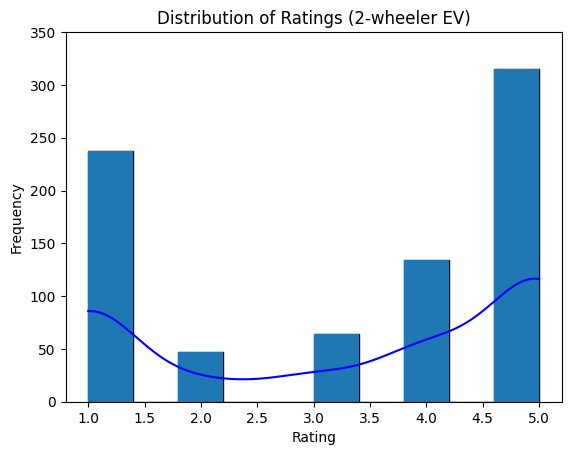

In [ ]:
import numpy as np  # Import numpy for array operations
sns.histplot(df_bikewale['rating'], kde=True, bins=10, color='blue')
plt.title('Distribution of Ratings (2-wheeler EV)')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Get histogram data
counts, bins, _ = plt.hist(df_bikewale['rating'], bins=10)

# Get maximum frequency
max_freq = np.max(counts)

# Set Y-axis ticks to include max frequency and extend beyond
plt.yticks(np.arange(0, max_freq + 51, 50))  # Ticks from 0 to max_freq + 50, step 50

plt.show()

Correlation heatmap

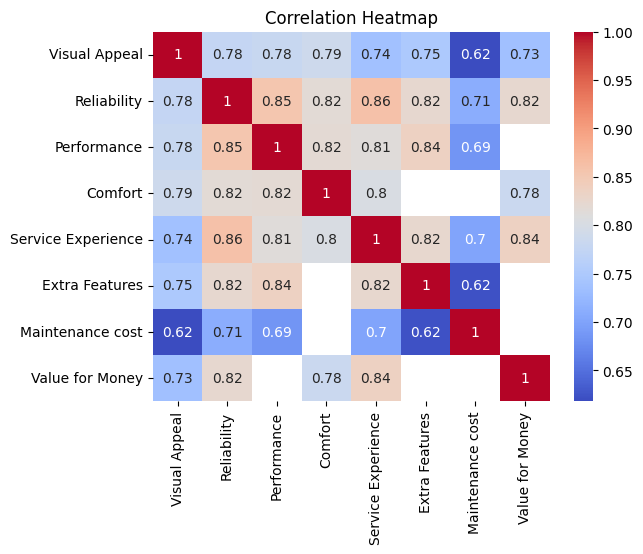

In [ ]:
corr = df_bikewale[['Visual Appeal', 'Reliability', 'Performance', 'Comfort', 'Service Experience', 'Extra Features', 'Maintenance cost', 'Value for Money']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Word count in reviews


In [ ]:
# df_bikewale['word_count'] = df_bikewale['review'].apply(lambda x: len(x.split()))
# sns.histplot(df_bikewale['word_count'], kde=True, color='green')
# plt.title('Word Count Distribution in Reviews')
# plt.xlabel('Word Count')
# plt.ylabel('Frequency')
# plt.show()

Model-Wise Average Rating Graph

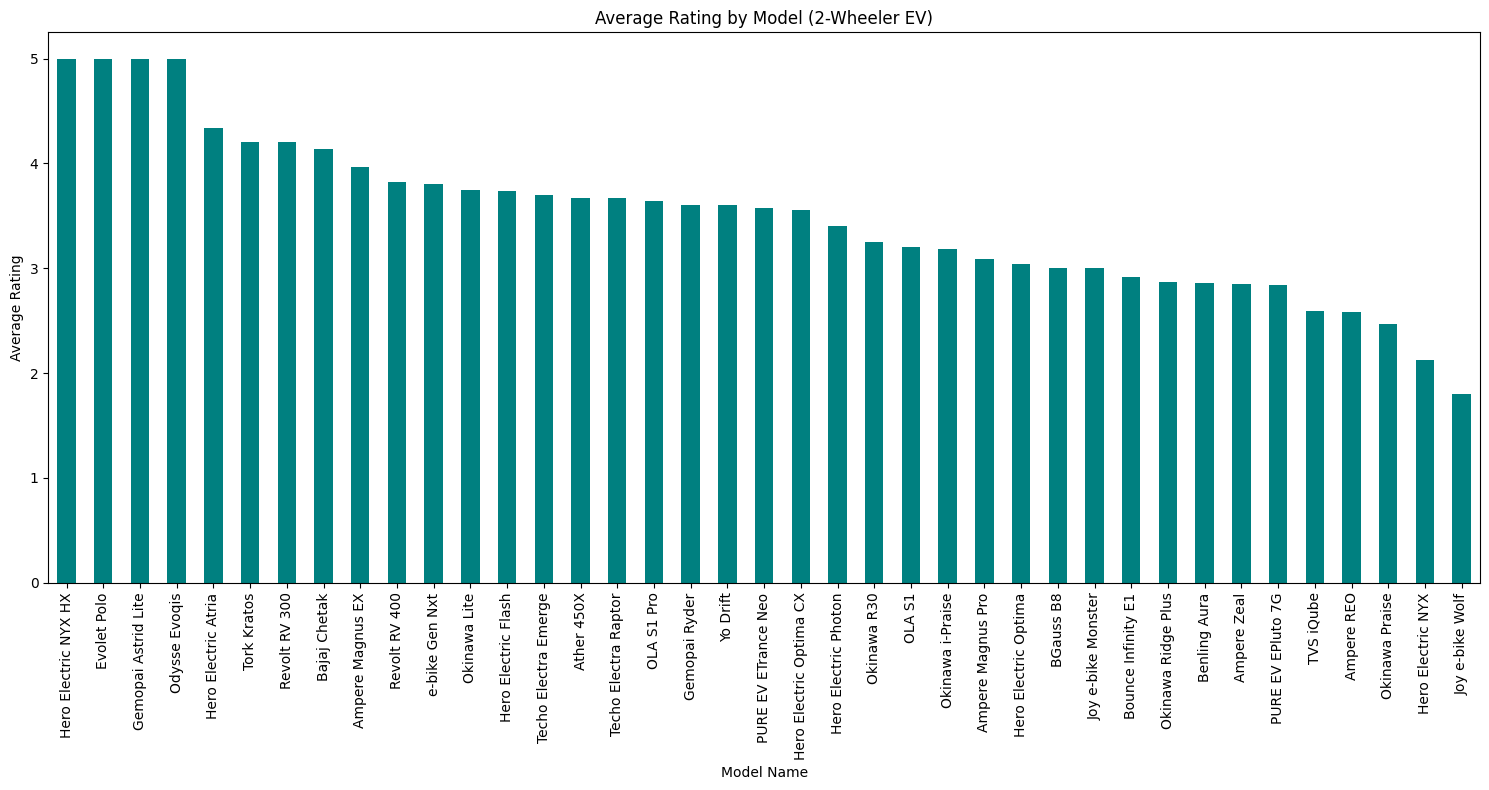

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Average rating for each model
model_ratings_bikewale = df_bikewale.groupby('Model Name')['rating'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(15, 8))
model_ratings_bikewale.plot(kind='bar', color='teal')
plt.title('Average Rating by Model (2-Wheeler EV)')
plt.xlabel('Model Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=90, ha='center')
plt.tight_layout()
plt.show()


Boxplot of Ratings by Model

In [ ]:
# plt.figure(figsize=(12, 6))
# sns.boxplot(data=df_bikewale, x='Model Name', y='rating', palette='Blues')
# plt.title('Rating Distribution by Model (2-Wheeler EV)')
# plt.xlabel('Model Name')
# plt.ylabel('Rating')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


Adding Sentiment Category

In [ ]:
df_bikewale['Sentiment'] = df_bikewale['rating'].apply(lambda x: 'Positive' if x >= 4 else 'Neutral' if x == 3 else 'Negative')

Sentiment Distribution

Positive: Rating >= 4
Neutral: Rating == 3
Negative: Rating <= 2

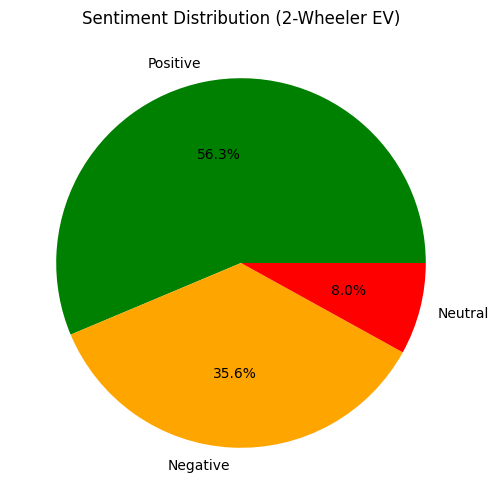

In [ ]:
sentiment_bikewale = df_bikewale['Sentiment'].value_counts()

plt.figure(figsize=(6, 6))
sentiment_bikewale.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'orange', 'red'])
plt.title('Sentiment Distribution (2-Wheeler EV)')
plt.ylabel('')
plt.show()

Word Cloud

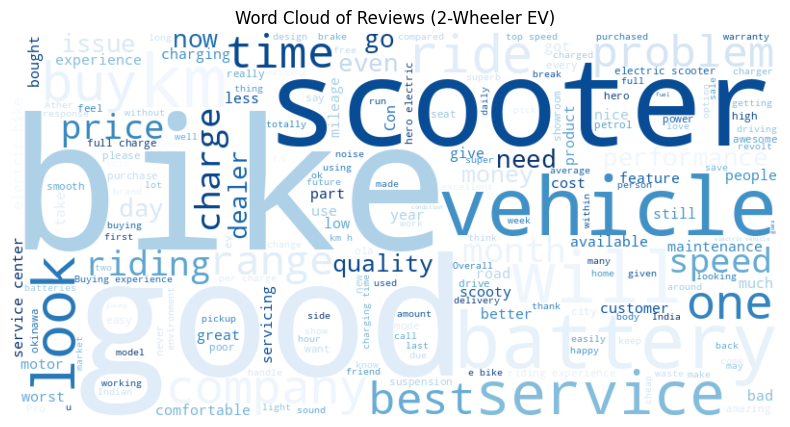

In [ ]:
from wordcloud import WordCloud

# For 2-Wheeler EV Reviews
text_2w = ' '.join(review for review in df_bikewale['review'] if isinstance(review, str))

wordcloud_2w = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(text_2w)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_2w, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews (2-Wheeler EV)')
plt.show()

# Exploratory Data Analysis ofor the  4-wheelers Dataset

## Dataset 1: 4-wheeler-EV-carwale.csv

In [ ]:
df_carwale = pd.read_csv('4-wheeler-EV-carwale.csv')

In [ ]:
print(df_carwale.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review           129 non-null    object 
 1   Exterior         129 non-null    float64
 2   Comfort          129 non-null    float64
 3   Performance      129 non-null    float64
 4   Fuel Economy     129 non-null    float64
 5   Value for Money  129 non-null    float64
 6   Condition        129 non-null    object 
 7   driven           129 non-null    object 
 8   rating           129 non-null    float64
 9   model_name       129 non-null    object 
dtypes: float64(6), object(4)
memory usage: 10.2+ KB
None


In [ ]:
print(df_carwale.describe())

         Exterior     Comfort  Performance  Fuel Economy  Value for Money  \
count  129.000000  129.000000   129.000000    129.000000       129.000000   
mean     4.472868    4.418605     4.418605      4.418605         4.162791   
std      0.968871    1.036051     1.150392      1.122899         1.345076   
min      0.000000    0.000000     0.000000      0.000000         0.000000   
25%      4.000000    4.000000     4.000000      4.000000         4.000000   
50%      5.000000    5.000000     5.000000      5.000000         5.000000   
75%      5.000000    5.000000     5.000000      5.000000         5.000000   
max      5.000000    5.000000     5.000000      5.000000         5.000000   

           rating  
count  129.000000  
mean     4.341085  
std      1.389110  
min      0.000000  
25%      4.000000  
50%      5.000000  
75%      5.000000  
max      5.000000  


In [ ]:
print(df_carwale.head())

                                              review  Exterior  Comfort  \
0  Superb car like as fantastic as petroleum car....       5.0      4.0   
1  Anti national, worst service, worst customer c...       1.0      1.0   
2           Super happy with it. The car is too good       4.0      5.0   
3  Pretty good car, smooth as a glider fast car, ...       5.0      5.0   
4  Price difference between petrol and electronic...       4.0      4.0   

   Performance  Fuel Economy  Value for Money      Condition  \
0          5.0           5.0              5.0            New   
1          1.0           1.0              1.0            New   
2          5.0           5.0              4.0            New   
3          5.0           5.0              5.0            New   
4          5.0           3.0              2.0  Not Purchased   

                    driven  rating    model_name  
0   Few hundred kilometers     5.0  hyundai kona  
1        Haven't driven it     0.0  hyundai kona  
2  Few thou

Checking for missing values

In [ ]:
print(df_carwale.isnull().sum())

review             0
Exterior           0
Comfort            0
Performance        0
Fuel Economy       0
Value for Money    0
Condition          0
driven             0
rating             0
model_name         0
dtype: int64


Rating Distribution

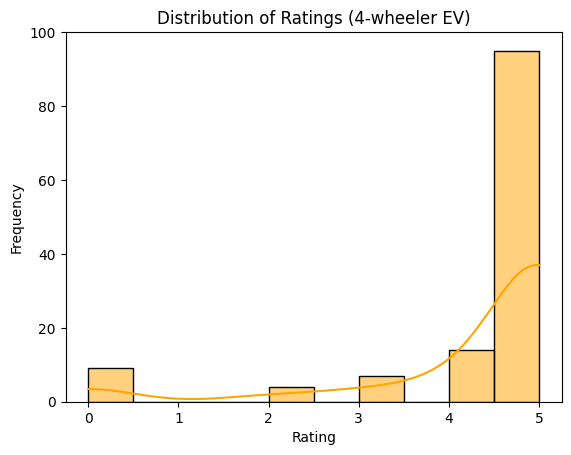

In [ ]:
sns.histplot(df_carwale['rating'], kde=True, bins=10, color='orange')
plt.title('Distribution of Ratings (4-wheeler EV)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.ylim(0, 100)
plt.show()

Sentiment Distribution

Positive: Rating >= 4
Neutral: Rating == 3
Negative: Rating <= 2

In [ ]:
df_carwale['Sentiment'] = df_carwale['rating'].apply(lambda x: 'Positive' if x >= 4 else 'Neutral' if x == 3 else 'Negative')

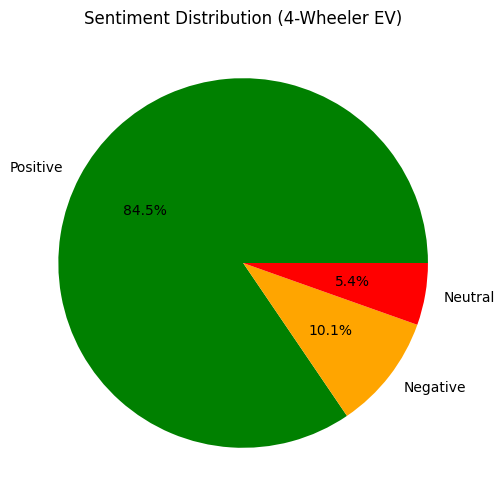

In [ ]:
sentiment_carwale = df_carwale['Sentiment'].value_counts()

plt.figure(figsize=(6, 6))
sentiment_carwale.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'orange', 'red'])
plt.title('Sentiment Distribution (4-Wheeler EV)')
plt.ylabel('')
plt.show()

Word Cloud

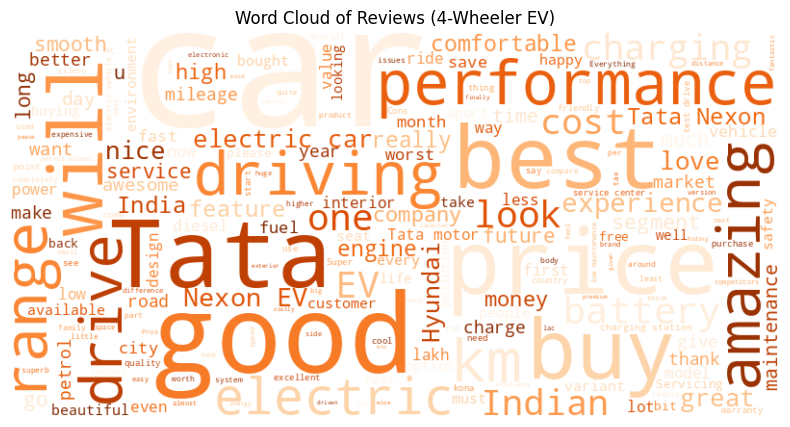

In [ ]:
text_4w = ' '.join(review for review in df_carwale['review'] if isinstance(review, str))

wordcloud_4w = WordCloud(width=800, height=400, background_color='white', colormap='Oranges').generate(text_4w)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_4w, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews (4-Wheeler EV)')
plt.show()

##Dataset 2 : 4-wheeler-EV-cardekho.csv

In [ ]:
df_cardekho = pd.read_csv('4-wheeler-EV-cardekho.csv')

In [ ]:
print(df_cardekho.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Review                140 non-null    object 
 1   Rating                140 non-null    float64
 2   Attributes Mentioned  140 non-null    object 
 3   Model                 140 non-null    object 
dtypes: float64(1), object(3)
memory usage: 4.5+ KB
None


In [ ]:
print(df_cardekho.describe())

           Rating
count  140.000000
mean     4.364286
std      0.992495
min      1.000000
25%      4.500000
50%      4.500000
75%      5.000000
max      5.000000


In [ ]:
print(df_cardekho.head())

                                              Review  Rating  \
0  Using it for the last 1 month. It's a gentle-l...     5.0   
1  In the beginning, the car performed excellentl...     1.0   
2  Hyundai is the best performing company beating...     5.0   
3  The car offers reasonable performance in this ...     5.0   
4  Hyundai Kona - First electric car of India was...     4.0   

                                Attributes Mentioned         Model  
0  ['mileage' 'performance' 'power' 'price' 'seat...  hyundai kona  
1        ['mileage' 'performance' 'service' 'parts']  hyundai kona  
2                          ['performance' 'service']  hyundai kona  
3                                    ['performance']  hyundai kona  
4  ['looks' 'comfort' 'interior' 'price' 'insuran...  hyundai kona  


Checking for missing values

In [ ]:
print(df_cardekho.isnull().sum())

Review                  0
Rating                  0
Attributes Mentioned    0
Model                   0
dtype: int64


In [ ]:
df_cardekho = df_cardekho.dropna(subset=['Review'])

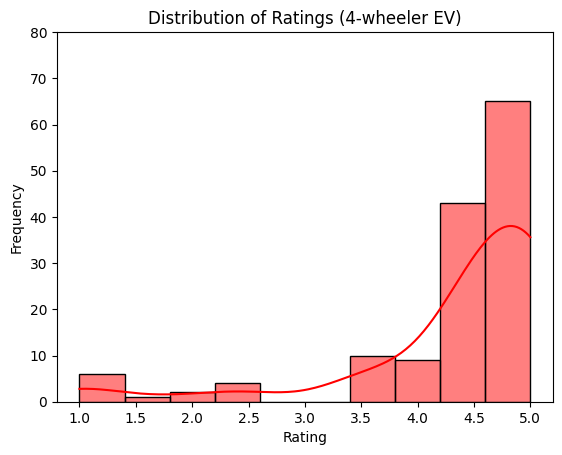

In [ ]:
sns.histplot(df_cardekho['Rating'], kde=True, bins=10, color='red')
plt.title('Distribution of Ratings (4-wheeler EV)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.ylim(0, 80)
plt.show()


In [ ]:
# df_cardekho['word_count'] = df_cardekho['Review'].apply(lambda x: len(x.split()))
# sns.histplot(df_cardekho['word_count'], kde=True, color='pink')
# plt.title('Word Count Distribution in Reviews')
# plt.xlabel('Word Count')
# plt.ylabel('Frequency')
# plt.show()

Sentiment Distribution

In [ ]:
df_cardekho['Sentiment'] = df_cardekho['Rating'].apply(lambda x: 'Positive' if x >= 4 else 'Neutral' if x == 3 else 'Negative')

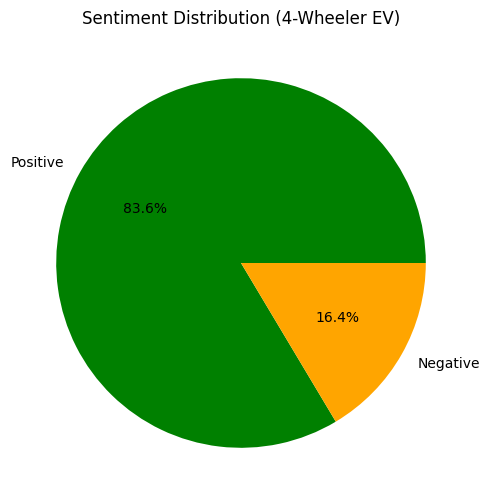

In [ ]:
sentiment_cardekho = df_cardekho['Sentiment'].value_counts()

plt.figure(figsize=(6, 6))
sentiment_cardekho.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'orange', 'red'])
plt.title('Sentiment Distribution (4-Wheeler EV)')
plt.ylabel('')
plt.show()

## By Combining Dataset (carwale and cardekho) dataset

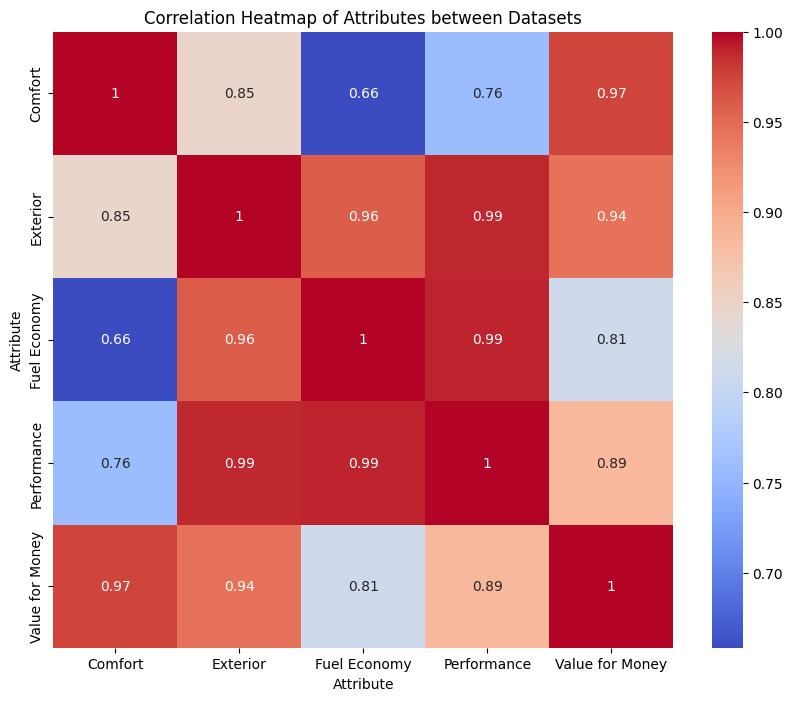

In [ ]:
# Create a list of relevant attributes from carwale
carwale_attributes = ['Exterior', 'Comfort', 'Performance', 'Fuel Economy', 'Value for Money']

# Create a dictionary to store the extracted attributes from cardekho
cardekho_attributes_dict = {}
for index, row in df_cardekho.iterrows():
    model = row['Model']
    attributes_mentioned = row['Attributes Mentioned']
    if isinstance(attributes_mentioned, str):  # Check for string type
        attributes = attributes_mentioned.split(', ')
        for attribute in attributes:
          attribute = attribute.strip() #remove white spaces at the begining and at the end.
          if attribute in carwale_attributes:
            if model not in cardekho_attributes_dict:
              cardekho_attributes_dict[model] = {attribute: 1}
            elif attribute not in cardekho_attributes_dict[model]:
              cardekho_attributes_dict[model][attribute] = 1
            else:
              cardekho_attributes_dict[model][attribute] += 1

# Create a list to store data for combined DataFrame
combined_data = []

# Iterate through carwale DataFrame
for index, row in df_carwale.iterrows():
    model = row['model_name']
    for attribute in carwale_attributes:
        combined_data.append({'Model': model, 'Attribute': attribute, 'Score': row[attribute]})

# Iterate through cardekho attributes and add them to combined data
for model, attributes in cardekho_attributes_dict.items():
    for attribute, count in attributes.items():
        combined_data.append({'Model': model, 'Attribute': attribute, 'Score': count})

# Create combined DataFrame
combined_df = pd.DataFrame(combined_data)

# Pivot the table to create the matrix
pivot_table = combined_df.pivot_table(index='Model', columns='Attribute', values='Score', aggfunc='mean')

# Correlation matrix
corr_matrix = pivot_table.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Attributes between Datasets')
plt.show()

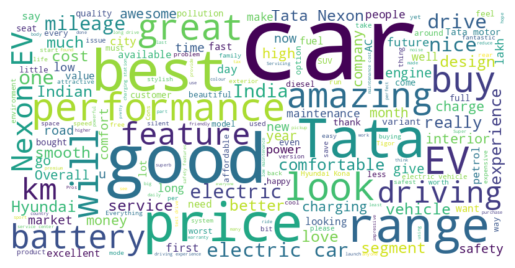

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming df_carwale and df_cardekho are already loaded as pandas DataFrames

# Combine reviews from both datasets
combined_reviews = pd.concat([df_carwale['review'], df_cardekho['Review']])

# Create the word cloud
text = " ".join(review for review in combined_reviews if isinstance(review, str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<Figure size 1200x600 with 0 Axes>

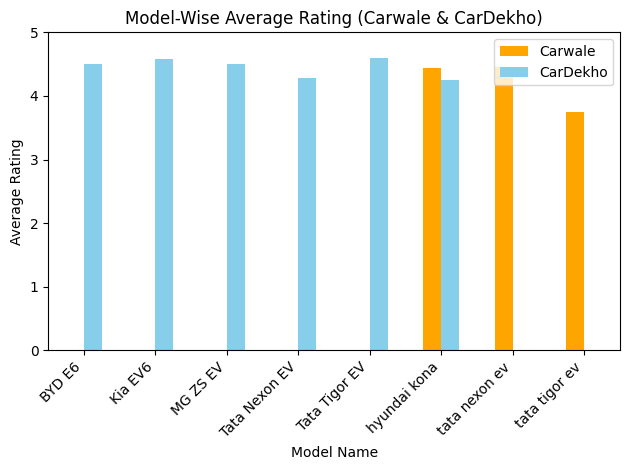

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Calculate average rating for each model in both datasets
model_ratings_carwale = df_carwale.groupby('model_name')['rating'].mean()
model_ratings_cardekho = df_cardekho.groupby('Model')['Rating'].mean()  # Assuming 'Model' column exists in cardekho

# Combine the average ratings into a single DataFrame
combined_ratings = pd.DataFrame({
    'Carwale': model_ratings_carwale,
    'CarDekho': model_ratings_cardekho
}).fillna(0)  # Fill NaNs with 0 for missing models in either dataset

# Plot the combined average ratings
plt.figure(figsize=(12, 6))
combined_ratings.plot(kind='bar', color=['orange', 'skyblue'])
plt.title('Model-Wise Average Rating (Carwale & CarDekho)')
plt.xlabel('Model Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 5)
plt.tight_layout()
plt.legend(['Carwale', 'CarDekho'])
plt.show()


#  Preprocessing for NLP Machine Learning Model Training

In [ ]:
!pip install dask[dataframe]

In [ ]:
# !pip install gensim

In [ ]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# import gensim.downloader as api
import nltk

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df_all = pd.concat([df_bikewale[['review', 'rating']],
                    df_carwale[['review', 'rating']],
                    df_cardekho[['Review', 'Rating']].rename(columns={'Review': 'review', 'Rating': 'rating'})])

```
    Cleans text by removing non-alphabetic characters, converting to lowercase,
    and removing stopwords.
```



In [ ]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join(word for word in text.split() if word not in stopwords.words('english'))  # Remove stopwords
    return text

In [ ]:
df_all['cleaned_review'] = df_all['review'].apply(preprocess_text)

In [ ]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text) # Tokenize the text
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmas)


In [ ]:
# Apply lemmatization after preprocessing:
df_all['lemmatized_review'] = df_all['cleaned_review'].apply(lemmatize_text)

In [ ]:
# Sentiment analysis : code aims to determine the sentiment (positive, negative, or neutral) expressed in each review using a technique called sentiment analysis. It uses a tool called VADER (Valence Aware Dictionary and sEntiment Reasoner)
sia = SentimentIntensityAnalyzer()

In [ ]:
df_all['sentiment_score'] = df_all['cleaned_review'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))  # Includes bigrams
X_text = vectorizer.fit_transform(df_all['lemmatized_review']).toarray()

In [ ]:
# One-Hot Encode Ratings
ohe = OneHotEncoder(sparse_output=False)
encoded_ratings = ohe.fit_transform(df_all[['rating']])

In [ ]:
# Combine features
X = np.hstack((X_text, df_all[['sentiment_score']].values, encoded_ratings))

In [ ]:
# df_all['sentiment'] = df_all['rating'].apply(lambda x: 'Positive' if x >= 4 else 'Neutral' if x == 3 else 'Negative')
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_all['rating'])  # Encodes Positive/Neutral/Negative


In [ ]:
# # Encode target labels
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(df_all['rating'])

In [ ]:
# # Debugging: Check class distribution
# print("Class distribution in the target variable:")
# print(np.unique(y, return_counts=True))

In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import warnings

In [ ]:
# Initialize models
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000, C=1.0),
    "AdaBoost": AdaBoostClassifier(n_estimators=200, random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42),
    "Ridge Classifier": RidgeClassifier()
}

In [ ]:
model_results = {
    "Model Name": [],
    "Accuracy": [],
    "F1-Score": []
}

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)

warnings.filterwarnings("ignore")

# Metrics
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions, average="weighted")

model_results["Model Name"].append("Random Forest")
model_results["Accuracy"].append(rf_accuracy)
model_results["F1-Score"].append(rf_f1)

print("Random Forest Results:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print(classification_report(y_test, rf_predictions))



Random Forest Results:
Accuracy: 0.9533
F1-Score: 0.9460
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.84      1.00      0.91        53
           3       1.00      0.76      0.87        17
           5       1.00      0.75      0.86        12
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00        96

    accuracy                           0.95       214
   macro avg       0.83      0.79      0.81       214
weighted avg       0.95      0.95      0.95       214



In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
import warnings

logistic_model = LogisticRegression(max_iter=1000, C=1.0)
logistic_model.fit(X_train_scaled, y_train)
logistic_predictions = logistic_model.predict(X_test_scaled)


# Suppress warnings globally
warnings.filterwarnings("ignore")
# Metrics
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_f1 = f1_score(y_test, logistic_predictions, average="weighted")

model_results["Model Name"].append("Logistic Regression")
model_results["Accuracy"].append(logistic_accuracy)
model_results["F1-Score"].append(logistic_f1)

print("Logistic Regression Results:")
print(f"Accuracy: {logistic_accuracy:.4f}")
print(f"F1-Score: {logistic_f1:.4f}")
print(classification_report(y_test, logistic_predictions))


Logistic Regression Results:
Accuracy: 0.7056
F1-Score: 0.6517
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.80      0.89      0.84        53
           3       1.00      0.24      0.38        17
           5       0.33      0.17      0.22        12
           7       0.50      0.17      0.26        29
           8       1.00      0.25      0.40         4
           9       0.69      0.96      0.80        96

    accuracy                           0.71       214
   macro avg       0.62      0.38      0.41       214
weighted avg       0.69      0.71      0.65       214



In [ ]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(n_estimators=200, random_state=42)
ada_model.fit(X_train_scaled, y_train)
ada_predictions = ada_model.predict(X_test_scaled)

warnings.filterwarnings("ignore")

# Metrics
ada_accuracy = accuracy_score(y_test, ada_predictions)
ada_f1 = f1_score(y_test, ada_predictions, average="weighted")

model_results["Model Name"].append("AdaBoost")
model_results["Accuracy"].append(ada_accuracy)
model_results["F1-Score"].append(ada_f1)

print("AdaBoost Results:")
print(f"Accuracy: {ada_accuracy:.4f}")
print(f"F1-Score: {ada_f1:.4f}")
print(classification_report(y_test, ada_predictions))


AdaBoost Results:
Accuracy: 0.9813
F1-Score: 0.9733
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        17
           5       0.75      1.00      0.86        12
           7       1.00      1.00      1.00        29
           8       0.00      0.00      0.00         4
           9       1.00      1.00      1.00        96

    accuracy                           0.98       214
   macro avg       0.82      0.86      0.84       214
weighted avg       0.97      0.98      0.97       214



In [ ]:
# Ridge Classifier
from sklearn.linear_model import RidgeClassifier

ridge_model = RidgeClassifier()
ridge_model.fit(X_train_scaled, y_train)
ridge_predictions = ridge_model.predict(X_test_scaled)

# Metrics
ridge_accuracy = accuracy_score(y_test, ridge_predictions)
ridge_f1 = f1_score(y_test, ridge_predictions, average="weighted")

warnings.filterwarnings("ignore")

model_results["Model Name"].append("Ridge Classifier")
model_results["Accuracy"].append(ridge_accuracy)
model_results["F1-Score"].append(ridge_f1)

print("Ridge Classifier Results:")
print(f"Accuracy: {ridge_accuracy:.4f}")
print(f"F1-Score: {ridge_f1:.4f}")
print(classification_report(y_test, ridge_predictions))


Ridge Classifier Results:
Accuracy: 0.7523
F1-Score: 0.7259
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.77      0.96      0.86        53
           3       0.88      0.41      0.56        17
           5       0.29      0.17      0.21        12
           7       0.53      0.34      0.42        29
           8       1.00      0.50      0.67         4
           9       0.79      0.92      0.85        96

    accuracy                           0.75       214
   macro avg       0.75      0.52      0.58       214
weighted avg       0.74      0.75      0.73       214



In [ ]:
# Import necessary libraries
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import warnings

# Suppress warnings globally
warnings.filterwarnings("ignore")

# Define the model
lgbm_model = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    verbosity=-1  # Suppress LightGBM-specific warnings
)

# Train the model
lgbm_model.fit(X_train_scaled, y_train)

# Make predictions
lgbm_predictions = lgbm_model.predict(X_test_scaled)

# Calculate metrics
lgbm_accuracy = accuracy_score(y_test, lgbm_predictions)
lgbm_f1 = f1_score(y_test, lgbm_predictions, average="weighted")

# Append results to the shared results structure
model_results["Model Name"].append("LightGBM")
model_results["Accuracy"].append(lgbm_accuracy)
model_results["F1-Score"].append(lgbm_f1)

# Print metrics
print("LightGBM Results:")
print(f"Accuracy: {lgbm_accuracy:.4f}")
print(f"F1-Score: {lgbm_f1:.4f}")
print(classification_report(y_test, lgbm_predictions))


LightGBM Results:
Accuracy: 0.9907
F1-Score: 0.9930
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        12
           6       0.00      0.00      0.00         0
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00        96

    accuracy                           0.99       214
   macro avg       0.88      0.79      0.81       214
weighted avg       1.00      0.99      0.99       214



In [ ]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier, LGBMRegressor

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose model based on approach
model = LGBMClassifier() if isinstance(y[0], int) else LGBMRegressor()

# Train model
model.fit(X_train, y_train)


LGBMRegressor()

In [ ]:
# prompt: write next code for accuracy

from sklearn.metrics import f1_score
# ... (Your existing code)

#LightGBM
# Import necessary libraries

# Suppress warnings globally
warnings.filterwarnings("ignore")

# Define the model
lgbm_model = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    verbosity=-1  # Suppress LightGBM-specific warnings
)

# Train the model
lgbm_model.fit(X_train_scaled, y_train)

# Make predictions
lgbm_predictions = lgbm_model.predict(X_test_scaled)

# Calculate metrics
lgbm_accuracy = accuracy_score(y_test, lgbm_predictions)
lgbm_f1 = f1_score(y_test, lgbm_predictions, average="weighted")

# Append results to the shared results structure
model_results["Model Name"].append("LightGBM")
model_results["Accuracy"].append(lgbm_accuracy)
model_results["F1-Score"].append(lgbm_f1)

# Print metrics
print("LightGBM Results:")
print(f"Accuracy: {lgbm_accuracy:.4f}")
print(f"F1-Score: {lgbm_f1:.4f}")
print(classification_report(y_test, lgbm_predictions))


LightGBM Results:
Accuracy: 0.9907
F1-Score: 0.9930
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        12
           6       0.00      0.00      0.00         0
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00        96

    accuracy                           0.99       214
   macro avg       0.88      0.79      0.81       214
weighted avg       1.00      0.99      0.99       214



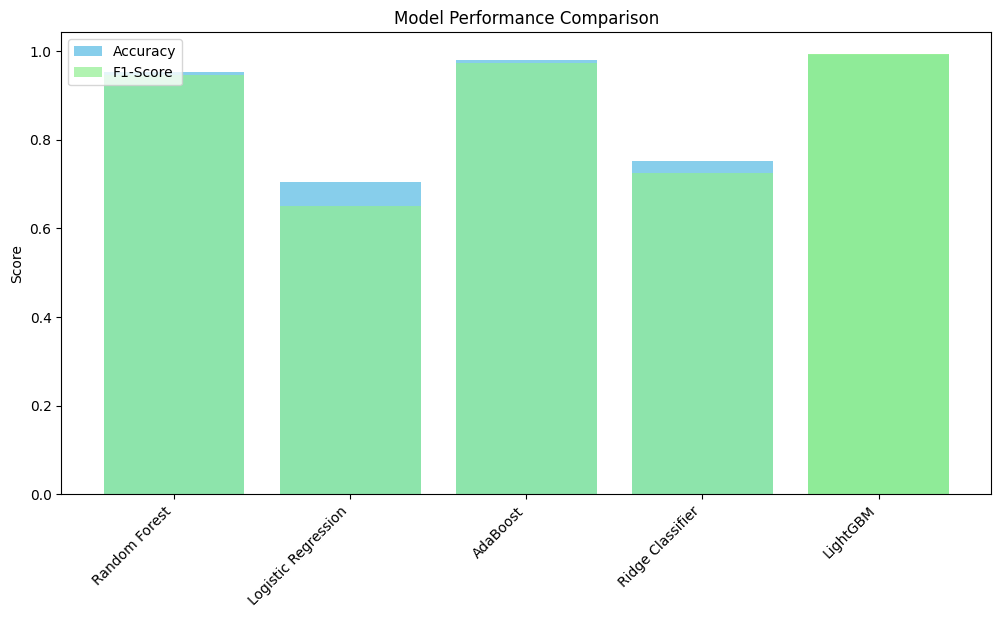

In [ ]:
import matplotlib.pyplot as plt

# Plot results
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.bar(model_results["Model Name"], model_results["Accuracy"], color='skyblue', label='Accuracy')

# Plot F1-Score
plt.bar(model_results["Model Name"], model_results["F1-Score"], color='lightgreen', alpha=0.7, label='F1-Score')

# Plot settings
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()


In [ ]:
!pip install seaborn

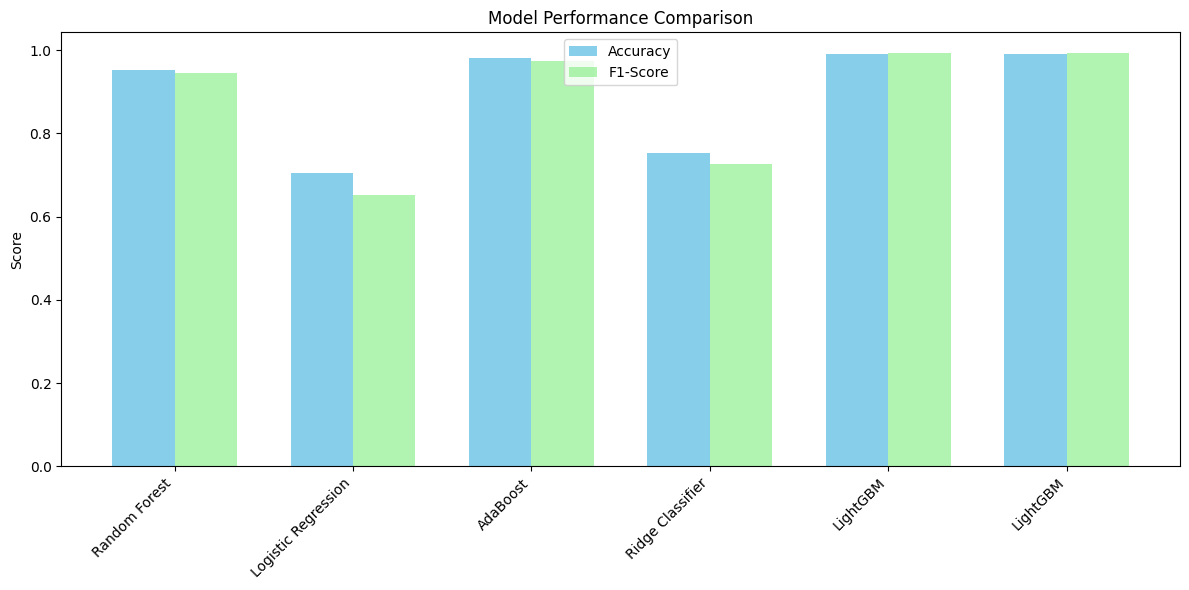

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get data
model_names = model_results["Model Name"]
accuracy_scores = model_results["Accuracy"]
f1_scores = model_results["F1-Score"]

# Set bar width and positions
bar_width = 0.35
x_pos_accuracy = np.arange(len(model_names))
x_pos_f1 = x_pos_accuracy + bar_width

# Create the figure and axes
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.bar(x_pos_accuracy, accuracy_scores, bar_width, color='skyblue', label='Accuracy')

# Plot F1-Score
plt.bar(x_pos_f1, f1_scores, bar_width, color='lightgreen', alpha=0.7, label='F1-Score')

# Plot settings
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(x_pos_accuracy + bar_width / 2, model_names, rotation=45, ha='right')  # Centered x-axis labels
plt.legend()
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [ ]:
import pickle
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load model and vectorizer
with open('lightgbm_model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

# Optional: only load scaler if you trained with it
# with open('scaler.pkl', 'rb') as f:
#     scaler = pickle.load(f)

# Init tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
analyzer = SentimentIntensityAnalyzer()

def preprocess(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text).lower()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

def predict_sentiment(text):
    cleaned = preprocess(text)
    tfidf_vec = vectorizer.transform([cleaned])
    sentiment_score = analyzer.polarity_scores(cleaned)['compound']
    combined = np.hstack((tfidf_vec.toarray(), [[sentiment_score]]))

    # No scaling used — model was likely trained on unscaled features
    pred = model.predict(combined)[0]

    # Map to sentiment
    if pred in [1, 2]:
        return "Negative"
    elif pred == 3:
        return "Neutral"
    else:
        return "Positive"

# Test
review = "The vehicle is fantastic and charges quickly!"
print("Sentiment:", predict_sentiment(review))


Sentiment: Positive


In [ ]:
import pickle
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load model, vectorizer, and label encoder
with open('lightgbm_model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
analyzer = SentimentIntensityAnalyzer()

def preprocess(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text).lower()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

def predict_sentiment_and_rating(text):
    cleaned = preprocess(text)
    tfidf_vec = vectorizer.transform([cleaned])

    # VADER compound score on raw text
    compound = analyzer.polarity_scores(text)['compound']
    mapped_vader_score = round(((compound + 1) * 2) + 1, 2)

    # Combine TF-IDF and compound score features
    combined_features = np.hstack((tfidf_vec.toarray(), [[compound]]))

    # Predict probabilities for each class
    proba = model.predict_proba(combined_features)[0]

    # Get actual class labels (e.g., 0,1,1.5,...,5)
    classes = label_encoder.classes_

    # Calculate expected rating as weighted sum of classes by predicted probabilities
    expected_rating = np.dot(proba, classes)

    # Round to nearest 0.5 for predicted rating
    predicted_rating = float(round(expected_rating * 2) / 2)

    # Sentiment label from compound score thresholds
    if compound <= -0.05:
        sentiment_label = "Negative"
    elif -0.05 < compound < 0.05:
        sentiment_label = "Neutral"
    else:
        sentiment_label = "Positive"

    return {
        'original_review': text,
        'predicted_rating': predicted_rating,
        'compound_score': compound,
        'mapped_vader_score': mapped_vader_score,
        'sentiment_label': sentiment_label
    }

# Example usage:
sample_reviews = [
    "Absolutely love this bike! It's smooth and fuel efficient.",
    "Worst experience ever. The engine failed in just two months.",
    "It's okay, not great but not too bad either.",
    "It's an average experience",
    "Amazing pickup and features for the price. Highly recommend!",
    "Disappointed with the mileage. Expected better."
]

for review in sample_reviews:
    result = predict_sentiment_and_rating(review)
    print(f"Review: {result['original_review']}")
    print(f"Predicted Rating : {result['predicted_rating']}")
    print(f"Compound Score: {result['compound_score']:.3f}")
    print(f"Mapped VADER Score (1–5): {result['mapped_vader_score']}")
    print(f"Sentiment Label: {result['sentiment_label']}")
    print("---")


Review: Absolutely love this bike! It's smooth and fuel efficient.
Predicted Rating : 5.0
Compound Score: 0.822
Mapped VADER Score (1–5): 4.64
Sentiment Label: Positive
---
Review: Worst experience ever. The engine failed in just two months.
Predicted Rating : 1.0
Compound Score: -0.813
Mapped VADER Score (1–5): 1.37
Sentiment Label: Negative
---
Review: It's okay, not great but not too bad either.
Predicted Rating : 4.5
Compound Score: 0.473
Mapped VADER Score (1–5): 3.95
Sentiment Label: Positive
---
Review: It's an average experience
Predicted Rating : 2.0
Compound Score: 0.000
Mapped VADER Score (1–5): 3.0
Sentiment Label: Neutral
---
Review: Amazing pickup and features for the price. Highly recommend!
Predicted Rating : 5.0
Compound Score: 0.784
Mapped VADER Score (1–5): 4.57
Sentiment Label: Positive
---
Review: Disappointed with the mileage. Expected better.
Predicted Rating : 3.0
Compound Score: -0.052
Mapped VADER Score (1–5): 2.9
Sentiment Label: Negative
---
